In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("airbnb_listing_train.csv")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,11602914,Luxury home 100m2+garden in center!,3123809,Marjolein,NaN,De Pijp - Rivierenbuurt,52.35368,4.90177,Entire home/apt,3,13,15-02-2020,0.27,1,0,220
1,13289321,East is where your home is!,10259430,Ana,NaN,Oud-Oost,52.35728,4.92052,Entire home/apt,4,14,19-06-2019,0.29,1,0,110
2,40779315,Amsterdam Central - LUXURY house in BUSY STREET,224969266,Mark,NaN,Centrum-West,52.37582,4.89850,Entire home/apt,2,9,16-03-2020,1.65,1,7,100
3,7820311,great appartment down town,693472,Ayden,NaN,Westerpark,52.37792,4.87300,Entire home/apt,3,42,17-02-2020,0.72,1,0,130
4,27346603,Private room with canal view in peaceful area,41888346,Alissa,NaN,Westerpark,52.38051,4.87493,Private room,2,89,26-02-2020,4.02,1,24,90


In [3]:
data.shape

(12901, 16)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12901 entries, 0 to 12900
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12901 non-null  int64  
 1   name                            12879 non-null  object 
 2   host_id                         12901 non-null  int64  
 3   host_name                       12893 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   12901 non-null  object 
 6   latitude                        12901 non-null  float64
 7   longitude                       12901 non-null  float64
 8   room_type                       12901 non-null  object 
 9   minimum_nights                  12901 non-null  int64  
 10  number_of_reviews               12901 non-null  int64  
 11  last_review                     11305 non-null  object 
 12  reviews_per_month               

In [5]:
data.describe()

,id,host_id,neighbourhood_group,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
count,1.290100e+04,1.290100e+04,0.0,12901.000000,12901.000000,12901.000000,12901.000000,11305.000000,12901.000000,12901.000000,12901.000000
mean,1.984923e+07,6.321700e+07,NaN,52.365313,4.889744,3.542516,24.803194,0.748501,2.136501,61.392295,166.959538
std,1.216241e+07,8.010814e+07,NaN,0.016418,0.036016,15.154077,53.406134,1.260791,6.001838,107.988329,234.794630
min,2.016800e+04,3.592000e+03,NaN,52.289270,4.755720,1.000000,0.000000,0.010000,1.000000,0.000000,6.000000
25%,9.869642e+06,8.948269e+06,NaN,52.355190,4.863950,2.000000,2.000000,0.180000,1.000000,0.000000,99.000000
50%,1.874939e+07,2.711601e+07,NaN,52.364570,4.887130,2.000000,9.000000,0.380000,1.000000,0.000000,135.000000
75%,2.914232e+07,8.337686e+07,NaN,52.375110,4.909310,3.000000,24.000000,0.770000,1.000000,87.000000,190.000000
max,4.370900e+07,3.490175e+08,NaN,52.425090,5.018400,1001.000000,843.000000,50.000000,78.000000,365.000000,9000.000000


In [6]:
data.corr()

,id,host_id,neighbourhood_group,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
id,1.000000,0.515113,NaN,0.006057,0.013995,-0.029802,-0.288677,0.034130,0.120712,0.046201,0.076998
host_id,0.515113,1.000000,NaN,0.001604,0.026642,-0.023976,-0.114027,0.105957,0.034070,0.121035,0.084512
neighbourhood_group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,0.006057,0.001604,NaN,1.000000,-0.154782,-0.005808,0.028620,0.025989,0.006339,0.034516,0.017697
longitude,0.013995,0.026642,NaN,-0.154782,1.000000,-0.001425,0.004946,0.019858,0.018887,0.036329,0.016718
minimum_nights,-0.029802,-0.023976,NaN,-0.005808,-0.001425,1.000000,-0.022010,-0.029696,-0.006950,0.056951,0.026569
number_of_reviews,-0.288677,-0.114027,NaN,0.028620,0.004946,-0.022010,1.000000,0.768207,-0.020619,0.274252,-0.035141
reviews_per_month,0.034130,0.105957,NaN,0.025989,0.019858,-0.029696,0.768207,1.000000,0.014680,0.304831,-0.003736
calculated_host_listings_count,0.120712,0.034070,NaN,0.006339,0.018887,-0.006950,-0.020619,0.014680,1.000000,0.095783,0.057314
availability_365,0.046201,0.121035,NaN,0.034516,0.036329,0.056951,0.274252,0.304831,0.095783,1.000000,0.153993


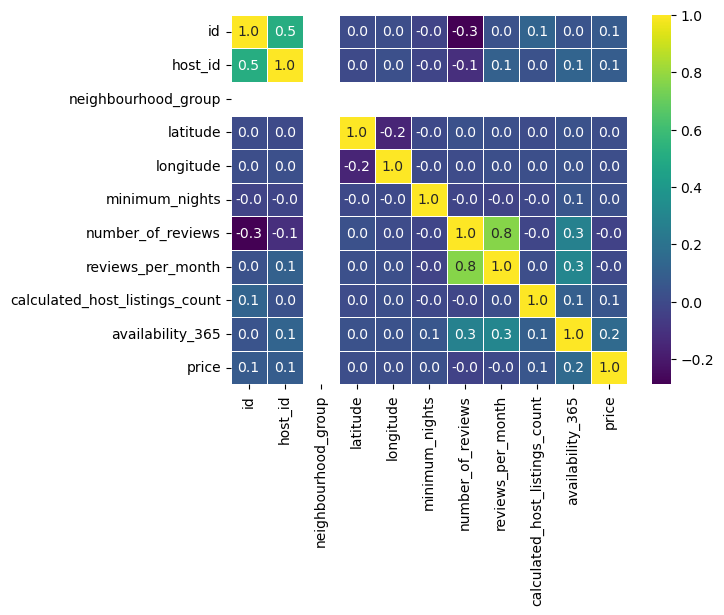

In [7]:
dataplot = sns.heatmap(data.corr(), cmap="viridis", fmt=".1f", annot=True, linewidths=0.5)
plt.show()

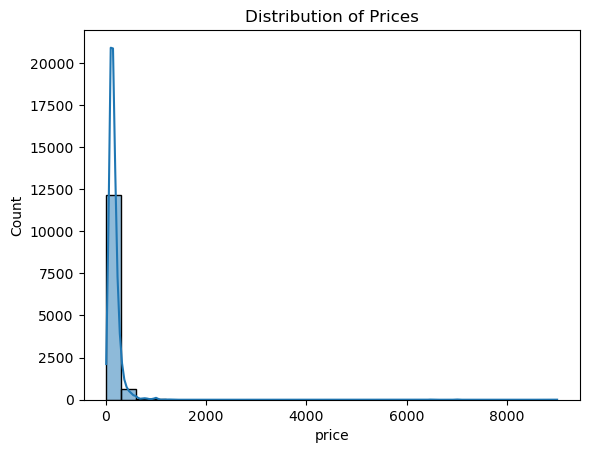

In [8]:
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.show()

In [9]:
data.isnull().sum()

id                                    0
name                                 22
host_id                               0
host_name                             8
neighbourhood_group               12901
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
last_review                        1596
reviews_per_month                  1596
calculated_host_listings_count        0
availability_365                      0
price                                 0
dtype: int64

In [10]:
data = data.drop(['id','name','host_name','neighbourhood_group','last_review'],axis=1)

In [11]:
X = data.drop('price',axis=1)
y = data['price']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
num_col = X.select_dtypes(include=['int64','float64']).columns
cat_col = X.select_dtypes(include=['object']).columns

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [15]:
num_trans = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_trans = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_trans, num_col),
        ('cat', cat_trans, cat_col)
    ])

In [16]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [17]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['host_id', 'latitude', 'longitude', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['neighbourhood', 'room_type'], dtype='object'))])),
                ('regressor', LinearRegression())])

In [18]:
y_pred = model.predict(X_test)

In [19]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [20]:
mse

46984.96454829035

In [21]:
r2

0.043921245861388236